<a href="https://colab.research.google.com/github/srijamannam/Data_wrangling/blob/main/Data_Wrangling_We_Rate_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Modules**

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import requests 
import tweepy 
import json 
plt.style.use("ggplot")

# **Gathering data**

**Reading the first data set**


In [ ]:
archive = pd.read_csv("/content/twitter-archive-enhanced.csv")
archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


**Using requests library to gather second piece of data** 

In [ ]:
# download image_predictions using requests

url=" https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response=requests.get(url)

with open (url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

image_pred = pd.read_csv("image-predictions.tsv",sep="\t")
image_pred.head(3)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


**Gather 3rd piece of data through Twitter API** 

In [ ]:
# get data using tweepy

consumer_key = 'IDIIVqpTekz1IaEKE9TeykORO'
consumer_secret = 'lzipwWPzAKA60fxFF2eqC5j8Un06ORm17GameBRHXTrIUPTkjL' 
access_token = '1333754604287270919-xAGucNOmE9wZoHLmAZtvLbQs4pug46'
access_token_secret = '7GZYxdPkjay0lB9wWCTMb4bm80Uk172hpcluLO4gMfQJb'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True)

# list of tweets available
tweet_list = []
# tweets unavailable
error_list = []

tweet_id = archive['tweet_id']


for id in tweet_id:
    try:
        page = api.get_status(id, tweet_mode='extended')
        favorites = page['favorite_count']
        retweet_count = page['retweet_count']
        tweet_list.append({'tweet_id': int(id),
                        'favorites': int(favorites),
                        'retweet_count': int(retweet_count)})
    
    except Exception as e:
        error_list.append(id)

In [ ]:
tweet_count = pd.DataFrame(tweet_list,columns=["tweet_id","favorites","retweet_count"])
tweet_count.to_csv("tweet_json.txt", encoding='utf-8')
tweet_count.head()

,tweet_id,favorites,retweet_count
0,892420643555336193,34113,7075
1,892177421306343426,29601,5344
2,891815181378084864,22290,3513
3,891689557279858688,37257,7276
4,891327558926688256,35615,7817


# **Assessing and Cleaning Data**

In [ ]:
# first make a copy of each dataframe 

archive_copy = archive.copy()
image_pred_copy = image_pred.copy()
tweet_count_copy = tweet_count.copy()

**The first piece of data**

In [ ]:
archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [ ]:
archive_copy.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [ ]:
archive_copy.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [ ]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [ ]:
archive_copy.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [ ]:
# drop these below columns as they are not necessary
archive_copy.drop(['retweeted_status_id',
                   'retweeted_status_user_id',
                   'retweeted_status_timestamp',
                   'in_reply_to_status_id',
                   'in_reply_to_user_id'], axis = 1, inplace = True)

In [ ]:
archive_copy['dog_stage'] = archive_copy['doggo'] + archive_copy['floofer'] + archive_copy['pupper'] + archive_copy['puppo']

archive_copy['dog_stage'].value_counts()

NoneNoneNoneNone        1976
NoneNonepupperNone       245
doggoNoneNoneNone         83
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: dog_stage, dtype: int64

In [ ]:
# for single one stage 
archive_copy['dog_stage'].replace("NoneNoneNoneNone","None ", inplace=True)
archive_copy['dog_stage'].replace("doggoNoneNoneNone","doggo", inplace=True)
archive_copy['dog_stage'].replace("NoneflooferNoneNone","floofer", inplace=True)
archive_copy['dog_stage'].replace("NoneNonepupperNone","pupper", inplace=True)
archive_copy['dog_stage'].replace("NoneNoneNonepuppo","puppo", inplace=True) 

# for multiple stages 
archive_copy['dog_stage'].replace("doggoNonepupperNone","doggo,pupper", inplace=True) 
archive_copy['dog_stage'].replace("doggoNoneNonepuppo","doggo,puppo", inplace=True) 
archive_copy['dog_stage'].replace("doggoflooferNoneNone","doggo,floofer", inplace=True) 

In [ ]:
archive_copy["dog_stage"].value_counts()

None             1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

In [ ]:
archive_copy.drop(["doggo","floofer","pupper","puppo"],axis=1,inplace=True)
archive_copy.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None


In [ ]:
archive_copy["source"].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [ ]:
source_dict={
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'Twitter for iPhone',
    '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'Vine - Make a Scene'  ,
    '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':'Twitter Web Client', 
    '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':'TweetDeck' 
}


# function replaces key with values
def rename_source(df):
    if df['source'] in source_dict.keys():
        abbreviation = source_dict[df['source']]
        return abbreviation
    else:
        return df['source']

In [ ]:
# function call    
archive_copy.source = archive_copy.apply(rename_source, axis=1)

In [ ]:
archive_copy["source"].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [ ]:
pd.set_option('display.max_rows', None)
archive_copy["name"].value_counts()

None              745
a                  55
Charlie            12
Cooper             11
Lucy               11
Oliver             11
Tucker             10
Penny              10
Lola               10
Winston             9
Bo                  9
Sadie               8
the                 8
Daisy               7
Buddy               7
Toby                7
an                  7
Bailey              7
Leo                 6
Oscar               6
Stanley             6
Rusty               6
Bella               6
Dave                6
Jack                6
Koda                6
Scout               6
Jax                 6
Milo                6
Louis               5
Phil                5
Sammy               5
Gus                 5
Chester             5
Alfie               5
Sunny               5
Bentley             5
very                5
Oakley              5
Finn                5
George              5
Larry               5
Clarence            4
Loki                4
Walter              4
Reggie    

In [ ]:
# name with str len less than or equal to 4
archive_copy.loc[archive_copy['name'].str.len() <= 4]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
5,891087950875897856,2017-07-29 00:08:17 +0000,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None
7,890729181411237888,2017-07-28 00:22:40 +0000,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None
10,890006608113172480,2017-07-26 00:31:25 +0000,Twitter for iPhone,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None
12,889665388333682689,2017-07-25 01:55:32 +0000,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,None,puppo
13,889638837579907072,2017-07-25 00:10:02 +0000,Twitter for iPhone,This is Ted. He does his best. Sometimes that'...,https://twitter.com/dog_rates/status/889638837...,12,10,Ted,None
16,888917238123831296,2017-07-23 00:22:39 +0000,Twitter for iPhone,This is Jim. He found a fren. Taught him how t...,https://twitter.com/dog_rates/status/888917238...,12,10,Jim,None
17,888804989199671297,2017-07-22 16:56:37 +0000,Twitter for iPhone,This is Zeke. He has a new stick. Very proud o...,https://twitter.com/dog_rates/status/888804989...,13,10,Zeke,None
22,887517139158093824,2017-07-19 03:39:09 +0000,Twitter for iPhone,I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,10,such,None


In [ ]:
archive_copy["name"].replace('None', 'Unknown', inplace = True)
archive_copy["name"].replace('a', 'Unknown', inplace = True)
archive_copy["name"].replace('an', 'Unknown', inplace = True)
archive_copy["name"].replace('the', 'Unknown', inplace = True)
archive_copy["name"].replace('Such', 'Unknown', inplace = True)


In [ ]:
archive_copy["name"].replace('0', 'Unknown', inplace = True)
archive_copy["name"].replace('by', 'Unknown', inplace = True)
archive_copy["name"].replace('this', 'Unknown', inplace = True)
archive_copy["name"].replace('mu', 'Unknown', inplace = True)

In [ ]:
archive_copy[["timestamp"]].head()

,timestamp
0,2017-08-01 16:23:56 +0000
1,2017-08-01 00:17:27 +0000
2,2017-07-31 00:18:03 +0000
3,2017-07-30 15:58:51 +0000
4,2017-07-29 16:00:24 +0000


In [ ]:
archive_copy["timestamp"].dtype

dtype('O')

In [ ]:
archive_copy["timestamp"].astype(str).head()

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

In [ ]:
archive_copy['date'] , archive_copy['time'] = archive_copy['timestamp'].str.split(' ',1).str

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


In [ ]:
archive_copy[["date","time"]].head()

,date,time
0,2017-08-01,16:23:56 +0000
1,2017-08-01,00:17:27 +0000
2,2017-07-31,00:18:03 +0000
3,2017-07-30,15:58:51 +0000
4,2017-07-29,16:00:24 +0000


In [ ]:
archive_copy["time"] = archive_copy["time"].str.rstrip('+0000')

In [ ]:
archive_copy[["time"]].head()

,time
0,16:23:56
1,00:17:27
2,00:18:03
3,15:58:51
4,16:00:24


In [ ]:
archive_copy.drop(["timestamp"],axis=1,inplace=True)

In [ ]:
archive_copy['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [ ]:
archive_copy['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [ ]:
not_ten = list(archive_copy.query("rating_denominator != 10").index)
archive_copy.drop(index=not_ten, inplace=True)

In [ ]:
archive_copy.query("rating_denominator != 10").index

Int64Index([], dtype='int64')

In [ ]:
archive_copy["ratings"]=archive_copy["rating_numerator"].astype(str) + "/" + archive_copy["rating_denominator"].astype(str)

In [ ]:
archive_copy[["ratings"]].head(3)

,ratings
0,13/10
1,13/10
2,12/10


In [ ]:
archive_copy.drop(["rating_denominator","rating_numerator"],axis=1,inplace=True)

In [ ]:
archive_copy.head(2)

,tweet_id,source,text,expanded_urls,name,dog_stage,date,time,ratings
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,2017-08-01,16:23:56,13/10
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,2017-08-01,00:17:27,13/10


**The second piece of data** 

In [ ]:
image_pred_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
image_pred_copy.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [ ]:
image_pred_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [ ]:
image_pred_copy.duplicated().sum()

0

In [ ]:
image_pred_copy.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [ ]:
image_pred_copy.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [ ]:
image_pred_copy['p1'].values

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd', ...,
       'Chihuahua', 'Chihuahua', 'orange'], dtype=object)

In [ ]:
# list of breeds
breed = []
# list of confidence of the prediction
confidence = []

# function to choose the breed which is true 
def choose_breed(df):
    if df['p1_dog'] == True:
        breed.append(df['p1'])
        confidence.append(df['p1_conf'])
    elif df['p2_dog'] == True:
        breed.append(df['p2'])
        confidence.append(df['p2_conf'])
    elif df['p3_dog'] == True:
        breed.append(df['p3'])
        confidence.append(df['p3_conf'])
    else:
        breed.append('Unknown')
        confidence.append(0)
        
      

In [ ]:
image_pred_copy.apply(choose_breed, axis=1)

# add the two columns
image_pred_copy['breed'] = breed
image_pred_copy['confidence'] = confidence
image_pred_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


In [ ]:
image_pred_copy.drop(["img_num" , "p1" , "p1_conf", "p1_dog", "p2", "p2_conf","p2_dog","p3", "p3_conf", "p3_dog"], axis=1, inplace= True)


In [ ]:
image_pred_copy.columns

Index(['tweet_id', 'jpg_url', 'breed', 'confidence'], dtype='object')

In [ ]:
image_pred_copy.head()

,tweet_id,jpg_url,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


**The third piece of data** 

In [ ]:
tweet_count_copy.head()

,tweet_id,favorites,retweet_count
0,892420643555336193,34113,7075
1,892177421306343426,29601,5344
2,891815181378084864,22290,3513
3,891689557279858688,37257,7276
4,891327558926688256,35615,7817


In [ ]:
tweet_count_copy.shape

(2327, 3)

In [ ]:
tweet_count_copy.isnull().sum()

tweet_id         0
favorites        0
retweet_count    0
dtype: int64

In [ ]:
tweet_count_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2327 non-null   int64
 1   favorites      2327 non-null   int64
 2   retweet_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [ ]:
tweet_count_copy.describe()

,tweet_id,favorites,retweet_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,7115.560808,2493.492909
std,6.820795e+16,11054.267613,4222.165419
min,6.660209e+17,0.000000,1.000000
25%,6.781394e+17,1234.000000,500.500000
50%,7.178418e+17,3074.000000,1159.000000
75%,7.986547e+17,8686.500000,2886.000000
max,8.924206e+17,145937.000000,71397.000000


In [ ]:
tweet_count_copy.dtypes

tweet_id         int64
favorites        int64
retweet_count    int64
dtype: object

In [ ]:
tweet_count_copy.duplicated().sum()

0

# **Merging all 3 data frames**

In [ ]:
final_df = pd.merge(archive_copy, tweet_count_copy, on='tweet_id', how='inner')

In [ ]:
final_df = pd.merge(final_df, image_pred_copy, on='tweet_id', how='inner')

In [ ]:
final_df.head()

,tweet_id,source,text,expanded_urls,name,dog_stage,date,time,ratings,favorites,retweet_count,jpg_url,breed,confidence
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,2017-08-01,16:23:56,13/10,34113,7075,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Unknown,0.000000
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,2017-08-01,00:17:27,13/10,29601,5344,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,2017-07-31,00:18:03,12/10,22290,3513,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,2017-07-30,15:58:51,13/10,37257,7276,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,2017-07-29,16:00:24,12/10,35615,7817,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712


In [ ]:
final_df.shape

(2039, 14)

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2039 entries, 0 to 2038
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tweet_id       2039 non-null   int64  
 1   source         2039 non-null   object 
 2   text           2039 non-null   object 
 3   expanded_urls  2039 non-null   object 
 4   name           2039 non-null   object 
 5   dog_stage      2039 non-null   object 
 6   date           2039 non-null   object 
 7   time           2039 non-null   object 
 8   ratings        2039 non-null   object 
 9   favorites      2039 non-null   int64  
 10  retweet_count  2039 non-null   int64  
 11  jpg_url        2039 non-null   object 
 12  breed          2039 non-null   object 
 13  confidence     2039 non-null   float64
dtypes: float64(1), int64(3), object(10)
memory usage: 238.9+ KB


In [ ]:
# save to csv file
final_df.to_csv('twitter_master.csv', index= False)

# **Analyzing and visualizing Data** 


Text(0.5, 1.0, 'source for tweets')

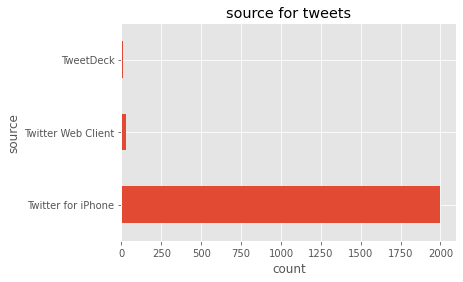

In [ ]:
final_df["source"].value_counts().plot.barh()

plt.xlabel("count")
plt.ylabel("source")
plt.title("source for tweets")

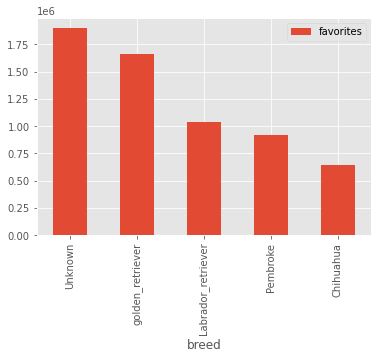

In [ ]:
final_df.groupby(['breed']).sum().sort_values("favorites",ascending=False)[["favorites"]].head(5).plot.bar()


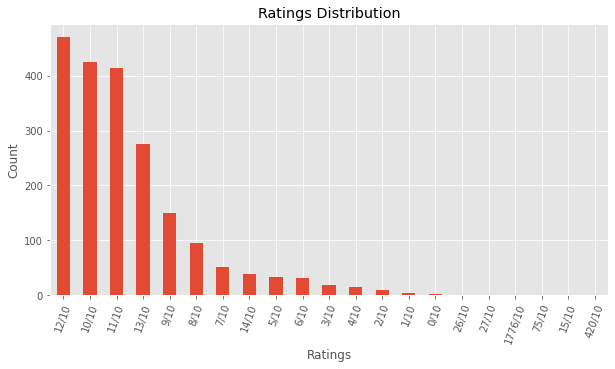

In [ ]:
#plot distribution of ratings

plt.figure(figsize=(10,5))
final_df.ratings.value_counts().plot.bar()
plt.title('Ratings Distribution')
plt.xticks(rotation=70)
plt.xlabel('Ratings')
plt.ylabel('Count');

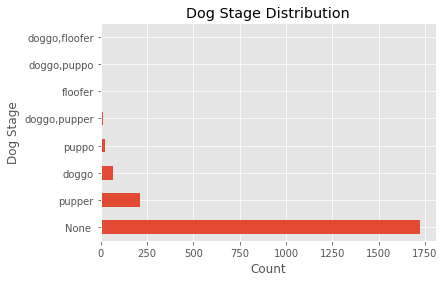

In [ ]:
final_df.dog_stage.value_counts().plot(kind = 'barh')
plt.title('Dog Stage Distribution')
plt.xlabel('Count')
plt.ylabel('Dog Stage');

Text(0, 0.5, 'breed')

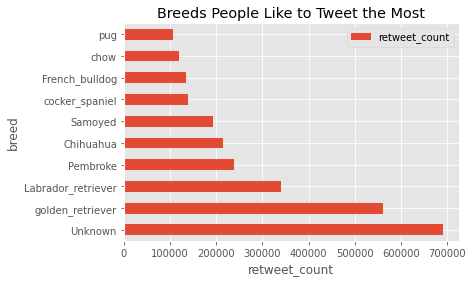

In [ ]:
#final_df.groupby(['breed']).sum().sort_values("favorites",ascending=False)[["favorites"]].head(5).plot.bar()
final_df.groupby(["breed"]).sum().sort_values("retweet_count",ascending=False)[["retweet_count"]].head(10).plot.barh()

plt.title('Breeds People Like to Tweet the Most')
plt.xlabel('retweet_count')
plt.ylabel('breed')

**Relation between favorite and retweet count**

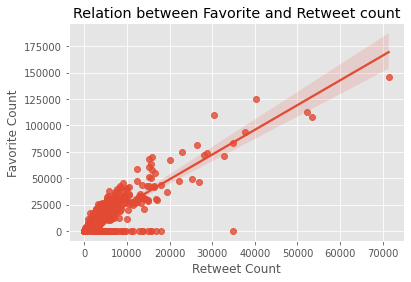

In [ ]:
sns.regplot(x = 'retweet_count', y = 'favorites', data = final_df)
plt.title('Relation between Favorite and Retweet count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');